In [1]:
# %config IPCompleter.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import functools
from dfply import *
import glob
import pickle

# Experiment 1

In [2]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_2.pkl')]
betas = [f["fitResults"]["x"][-3] for f in fit_list]
Ns = [f["fitResults"]["x"][-2] for f in fit_list]
N_primes = [f["fitResults"]["x"][-1] for f in fit_list]

In [3]:
len(fit_list)

59

<AxesSubplot:ylabel='Count'>

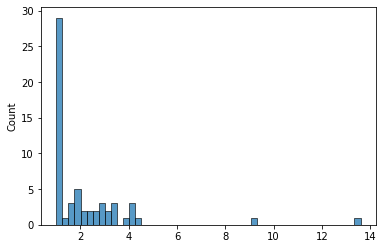

In [4]:
sns.reset_orig()
sns.histplot(Ns, bins=50)

<AxesSubplot:ylabel='Count'>

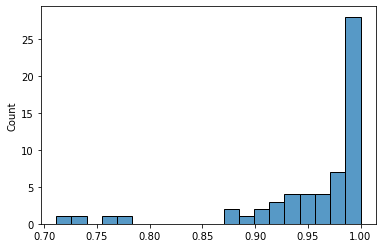

In [5]:
sns.reset_orig()
sns.histplot(betas, bins=20)

<AxesSubplot:ylabel='Count'>

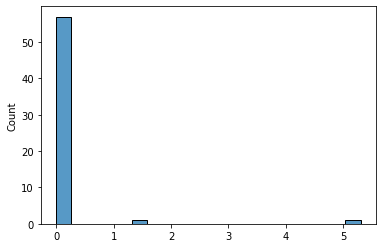

In [6]:
sns.reset_orig()
sns.histplot(N_primes, bins=20)

Loading in their data, I can't reproduce the paper's figure 5b. In particular N is wrong, their plot shows values of N around 100 and 150 that aren't in these model outputs.

# Experiment 2

In [7]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
betas = [f["fitResults"]["x"][-3] for f in fit_list]
Ns = [f["fitResults"]["x"][-2] for f in fit_list]
N_primes = [f["fitResults"]["x"][-1] for f in fit_list]

In [8]:
len(fit_list)

84

<AxesSubplot:ylabel='Count'>

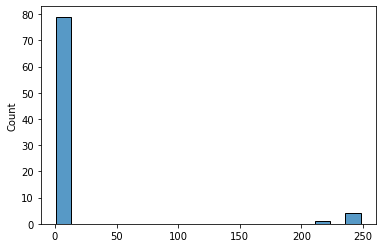

In [9]:
sns.reset_orig()
sns.histplot(Ns, bins=20)

<AxesSubplot:ylabel='Count'>

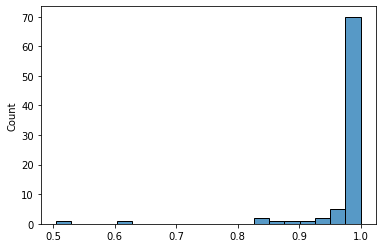

In [10]:
sns.reset_orig()
sns.histplot(betas, bins=20)

<AxesSubplot:ylabel='Count'>

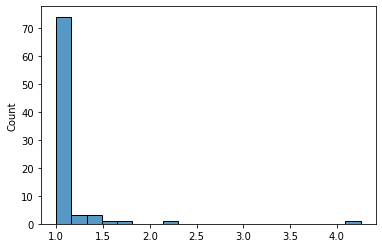

In [11]:
sns.reset_orig()
sns.histplot(N_primes, bins=20)

For experiment 2, things look quite different for N and N'. This just isn't what is shown in figure 8. And in this case there are the right number of model outputs for paricipants, so it's not just that things are missing. It's that there are many more ~1's than shown in the original paper and no values between ~10 and 150 as are shown in the paper. The results here are just completely different.

# write out model comparison fits to latex

In [35]:
def df_bic_exp1():
    fit_list_1 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_1.pkl')]
    fit_list_2 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_2.pkl')]
    fit_list_4 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_4.pkl')]
    fit_list_5 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_5.pkl')]
    bic1 = sum([fit['bic'] for fit in fit_list_1]) 
    bic2 = sum([fit['bic'] for fit in fit_list_2]) 
    bic4 = sum([fit['bic'] for fit in fit_list_4]) 
    bic5 = sum([fit['bic'] for fit in fit_list_5]) 
    output = pd.DataFrame({
    "model":["BS simple","BS complex","PT+N simple","PT+N complex","BS avg.","PT+N avg."],
    "BIC":[bic1, bic2, bic4, bic5, (bic1+bic2)/2, (bic4+bic5)/2]
    })
    return(output)
df_bic_exp1()

def df_bic_exp2():
    fit_list_1 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_1.pkl')]
    fit_list_2 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
    fit_list_4 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_4.pkl')]
    fit_list_5 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_5.pkl')]
    bic1 = sum([fit['bic'] for fit in fit_list_1]) 
    bic2 = sum([fit['bic'] for fit in fit_list_2]) 
    bic4 = sum([fit['bic'] for fit in fit_list_4]) 
    bic5 = sum([fit['bic'] for fit in fit_list_5]) 
    output = pd.DataFrame({
    "model":["BS simple","BS complex","PT+N simple","PT+N complex","BS avg.","PT+N avg."],
    "BIC":[bic1, bic2, bic4, bic5, (bic1+bic2)/2, (bic4+bic5)/2]
    }
    )
    return(output)

outputs = pd.DataFrame(
    {
        "model":df_bic_exp1().model, 
        "Exp. 1": df_bic_exp1().BIC,
        "Exp. 2": df_bic_exp2().BIC
    }
)

with open('paper/original-fits.tex', 'w') as tf:
     tf.write(outputs.to_latex())

In [39]:
with open('paper-rmd/original-fits.csv', 'w') as tf:
     tf.write(outputs.to_csv())

# Comparing responses and model predictions

Do the model predictions actually fit the observed responses?

In [12]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
df = pd.concat([pd.read_csv(f) for f in glob.glob('osfstorage-archive/Experiment 2/*.csv')], ignore_index = True)
df = (df >> 
     filter_by(~X.querydetail.str.contains("(warm|snowy)")) >>
#       mutate(estimate = X.estimate/100.) >>
      group_by(X.ID, X.querydetail, X.querytype) >>
      summarize(estimate = np.mean(X.estimate)) >>
      ungroup()
#       mutate(estimate = X.estimate.replace({0:.01, 1:.99})) >>
#       mutate(conjdisj_trial = X.querytype.apply(is_conjdisj))
     )

query_order = [' cold',
  ' rainy',
  ' not cold',
  ' not rainy',
  ' cold and rainy',
  ' rainy and not cold',
  ' cold and not rainy',
  ' not cold and not rainy',
  ' cold or rainy',
  ' rainy or not cold',
  ' cold or not rainy',
  ' not cold or not rainy',
  ' cold given rainy',
  ' not cold given rainy',
  ' cold given not rainy',
  ' not cold given not rainy',
  ' rainy given cold',
  ' not rainy given cold',
  ' rainy given not cold',
  ' not rainy given not cold',
  ' windy',
  ' cloudy',
  ' not windy',
  ' not cloudy',
  ' windy and cloudy',
  ' cloudy and not windy',
  ' windy and not cloudy',
  ' not windy and not cloudy',
  ' windy or cloudy',
  ' cloudy or not windy',
  ' windy or not cloudy',
  ' not windy or not cloudy',
  ' windy given cloudy',
  ' not windy given cloudy',
  ' windy given not cloudy',
  ' not windy given not cloudy',
  ' cloudy given windy',
  ' not cloudy given windy',
  ' cloudy given not windy',
  ' not cloudy given not windy',
  ' warm',
  ' snowy',
  ' not warm',
  ' not snowy',
  ' warm and snowy',
  ' snowy and not warm',
  ' warm and not snowy',
  ' not warm and not snowy',
  ' warm or snowy',
  ' snowy or not warm',
  ' warm or not snowy',
  ' not warm or not snowy',
  ' warm given snowy',
  ' not warm given snowy',
  ' warm given not snowy',
  ' not warm given not snowy',
  ' snowy given warm',
  ' not snowy given warm',
  ' snowy given not warm',
  ' not snowy given not warm']


df.querydetail = df.querydetail.astype("category")
df.querydetail.cat.set_categories(query_order, inplace=True)
df = df.sort_values(["ID", "querydetail"])

df[df.ID==1].head()

/opt/conda/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,querytype,querydetail,ID,estimate
5,A,cold,1,67.666667
28,B,rainy,1,79.000000
15,notA,not cold,1,45.000000
20,notB,not rainy,1,56.000000
7,AandB,cold and rainy,1,76.000000


In [13]:
pred_list = [f['predmean'] for f in fit_list]

df['model_pred'] = np.concatenate(pred_list)*100 # maybe this is wrong?

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model_pred', ylabel='estimate'>

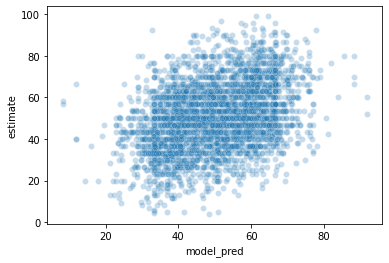

In [14]:
# df.plot.scatter(x='model_pred',y='estimate')
plot_df = df #>> filter_by(X.querytype.apply(lambda x: x in ["A","B"]))
sns.scatterplot(plot_df.model_pred, plot_df.estimate, alpha=.25)#, hue=plot_df.querytype)

In [15]:
df[["model_pred", "estimate"]].corr()

,model_pred,estimate
model_pred,1.000000,0.360753
estimate,0.360753,1.000000


For the individual responses, the correlations are quite modest. But the study was designed to test on average.

## Fit of average predictions by query

The plots in the paper indicate the fit of the models' average predictions to the average responses for each trial type. No actual fit statistics are given but these are much more closely predictive.

<AxesSubplot:xlabel='mean_pred', ylabel='mean_est'>

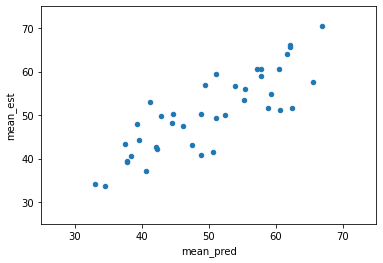

In [16]:
plot_df = df >> group_by(X.querydetail) >> summarize(mean_est = np.mean(X.estimate), mean_pred = np.mean(X.model_pred))
plot_df.plot.scatter(x="mean_pred", y="mean_est", xlim=(25,75), ylim=(25,75))


In [17]:
plot_df.corr()

,mean_est,mean_pred
mean_est,1.000000,0.837947
mean_pred,0.837947,1.000000


$R^2 = .68$ is a pretty decent model fit and much better than the individual-level means.

In [18]:
def print_bic_exp2():
    fit_list_1 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_1.pkl')]
    fit_list_2 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
    fit_list_4 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_4.pkl')]
    fit_list_5 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_5.pkl')]
    bic1 = sum([fit['bic'] for fit in fit_list_1]) 
    bic2 = sum([fit['bic'] for fit in fit_list_2]) 
    bic4 = sum([fit['bic'] for fit in fit_list_4]) 
    bic5 = sum([fit['bic'] for fit in fit_list_5]) 
    print("BS simple", bic1)
    print("BS complex", bic2)
    print("PTN simple", bic4)
    print("PTN complex", bic5)
    print("BS avg", (bic1+bic2)/2)
    print("PTN avg", (bic4+bic5)/2)
print_bic_exp2()

BS simple -5371.944608646983
BS complex -5099.280464552781
PTN simple -4901.106207956662
PTN complex -5159.638213495084
BS avg -5235.612536599882
PTN avg -5030.372210725873


From BIC, the simple version of the BS is a very clear winner out of all 4 possible models. That's a bit funny tho since it can't explain conjunction fallacy which is pretty important. If you consider the 4 individual models, then the story is kind of ambiguous. And in fact, if you stipulate you need to care about complex versions, then PTN wins. I wonder if the ambiguity is why they lumped the simple and complex together? Still no explantion for why they didn't just compute BIC overall---from chatting with Zhu sounds like a reviewer pushed them this direction.

# Experiment 1

Below, with experiment 1's data now complete, we can see it's the same story.

In [44]:
## experiment 1
def print_bic_exp1():
    fit_list_1 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_1.pkl')]
    fit_list_2 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_2.pkl')]
    fit_list_4 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_4.pkl')]
    fit_list_5 = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_5.pkl')]
    bic1 = sum([fit['bic'] for fit in fit_list_1]) 
    bic2 = sum([fit['bic'] for fit in fit_list_2]) 
    bic4 = sum([fit['bic'] for fit in fit_list_4]) 
    bic5 = sum([fit['bic'] for fit in fit_list_5]) 
    print("BS simple", bic1)
    print("BS complex", bic2)
    print("PTN simple", bic4)
    print("PTN complex", bic5)
    print("BS avg", (bic1+bic2)/2)
    print("PTN avg", (bic4+bic5)/2)
print_bic_exp1()

BS simple 956.9175376053546
BS complex 1174.3709176309171
PTN simple 1257.519966228404
PTN complex 1039.7315737683211
BS avg 1065.6442276181358
PTN avg 1148.6257699983626


In [91]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit_results/*_model_2.pkl')]
df_exp1 = pd.concat([pd.read_csv(f) for f in glob.glob('osfstorage-archive/Experiment 1/*.csv')], ignore_index = True)
df_exp1 = (df_exp1 >> 
     # filter_by(~X.querydetail.str.contains("(warm|snowy)")) >>
#       mutate(estimate = X.estimate/100.) >>
      group_by(X.ID, X.querydetail, X.querytype) >>
      summarize(estimate = np.mean(X.estimate)) >>
      ungroup()
#       mutate(estimate = X.estimate.replace({0:.01, 1:.99})) >>
#       mutate(conjdisj_trial = X.querytype.apply(is_conjdisj))
     )

# from clean_data() function
query_order = [' icy',
 ' frosty',
 ' not icy',
 ' not frosty',
 ' icy and frosty',
 ' frosty and not icy',
 ' icy and not frosty',
 ' not icy and not frosty',
 ' icy or frosty',
 ' frosty or not icy',
 ' icy or not frosty',
 ' not icy or not frosty',
 ' icy given frosty',
 ' not icy given frosty',
 ' icy given not frosty',
 ' not icy given not frosty',
 ' frosty given icy',
 ' not frosty given icy',
 ' frosty given not icy',
 ' not frosty given not icy',
 ' normal',
 ' typical',
 ' not normal',
 ' not typical',
 ' normal and typical',
 ' typical and not normal',
 ' normal and not typical',
 ' not normal and not typical',
 ' normal or typical',
 ' typical or not normal',
 ' normal or not typical',
 ' not normal or not typical',
 ' normal given typical',
 ' not normal given typical',
 ' normal given not typical',
 ' not normal given not typical',
 ' typical given normal',
 ' not typical given normal',
 ' typical given not normal',
 ' not typical given not normal']

test_df = (df_exp1 >> filter_by(X.ID==1))
# test_df = df_exp1

df_exp1.querydetail = df_exp1.querydetail.astype("category")
df_exp1.querydetail.cat.set_categories(query_order, inplace=True)
df_exp1 = df_exp1.sort_values(["ID", "querydetail"])

df_exp1[df_exp1.ID==1].head()

,querytype,querydetail,ID,estimate
5,A,icy,1,50.333333
0,B,frosty,1,38.333333
22,notA,not icy,1,52.000000
19,notB,not frosty,1,48.333333
6,AandB,icy and frosty,1,61.666667


In [92]:
pred_list = [f['predmean'] for f in fit_list]

df_exp1['model_pred'] = np.concatenate(pred_list)*100 # maybe this is wrong?

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model_pred', ylabel='estimate'>

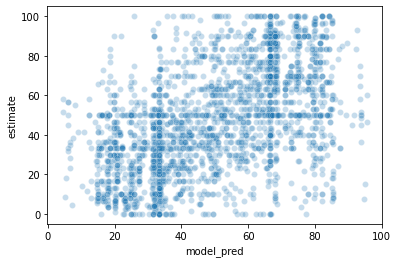

In [97]:
plot_df = df_exp1 #>> filter_by(X.querytype.apply(lambda x: x in ["A","B"]))
sns.scatterplot(plot_df.model_pred, plot_df.estimate, alpha=.25)#, hue=plot_df.querytype)

In [94]:
df_exp1[["model_pred", "estimate"]].corr()

,model_pred,estimate
model_pred,1.000000,0.498532
estimate,0.498532,1.000000


<AxesSubplot:xlabel='mean_pred', ylabel='mean_est'>

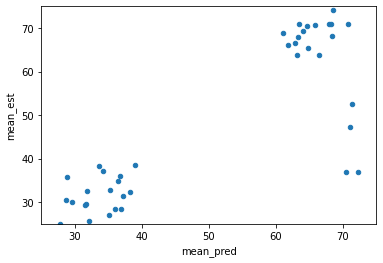

In [101]:
plot_df = df_exp1 >> group_by(X.querydetail) >> summarize(mean_est = np.mean(X.estimate), mean_pred = np.mean(X.model_pred))
plot_df.plot.scatter(x="mean_pred", y="mean_est", xlim=(25,75), ylim=(25,75))

In [102]:
plot_df.corr()

,mean_est,mean_pred
mean_est,1.000000,0.847245
mean_pred,0.847245,1.000000


These fits look pretty funky, but the response-level correlations are actually stronger than before. There are however 4 clear outliers. Looking below, those are some of the disjunctions that can be read as elaborations rather than true disjunctions.

In [103]:
plot_df

,querydetail,mean_est,mean_pred
0,icy,27.056497,35.119061
1,frosty,28.412429,36.881022
2,not icy,65.429379,64.880939
3,not frosty,63.881356,63.118978
4,icy and frosty,38.237288,33.606649
5,frosty and not icy,30.045198,29.530362
6,icy and not frosty,25.090395,27.768830
7,not icy and not frosty,66.096045,61.766835
8,icy or frosty,32.395480,38.233165
9,frosty or not icy,36.847458,72.231170


### Conjunction fallacies

Could be good to examine presence of conjunction fallacies.